### Haberman's Survival Data Set

https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

$x_{n,1}$=age, $x_{n,2}$= year, $x_{n,3}$= number of axillary nodes

$t=1,2$ (survival, death)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [11]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

def softmax(a):    
    return (np.exp(a.T)/ sum(np.exp(a.T))).T

In [12]:
data=np.genfromtxt('haberman.data',delimiter=',')

In [13]:
t_raw = data[:,-1]%2
X_raw = data[:,:3]
t=np.eye(2)[t_raw.astype(int)]    ## to_binary
X = np.concatenate([X_raw,np.ones(shape=(X_raw.shape[0],1))],axis=1)

In [17]:
sum(t_raw) #t_raw.shape

225.0

In [18]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(214, 4) (214, 2)
(92, 4) (92, 2)


### Set-up

$$\begin{aligned} \text{input: }&\quad \mathbf x=[x_1, \dots, x_k, 1]\\
\text{hidden layer: }& \quad  \mathbf x \mathbf w^{(1)}=[z_1, \dots , z_m]\\
 &  \phantom{LLLLLLLL}\text{with } \mathbf w^{(1)} \text{ of size } (k+1) \times m\\
& \quad \mathbf h=[h_1, \cdots , h_m, 1]\\ & \quad \phantom{\mathbf h} =[\sigma(z_1), \dots , \sigma(z_m), 1 ] \quad ( \sigma : \text{sigmoid})\\
\text{output: }&\quad \mathbf y=[y_1, \dots , y_s]= \pmb \sigma (\mathbf h \mathbf w^{(2)}) \quad ( \pmb \sigma : \text{softmax})\\ & \phantom{LLLLLLLL}\text{with } \mathbf w^{(2)} \text{ of size } (m+1) \times s \end{aligned}$$



### Formulas

$$ E(\mathbf w^{(1)}, \mathbf w^{(2)})= - \sum_{i=1}^s t_i \ln y_i $$

$$\nabla_{\mathbf w^{(2)}} E = \mathbf h^\top (\mathbf y- \mathbf t) $$

$$ \nabla E_{\mathbf w^{(1)}} = \mathbf x^T \ \left [ h_q(1-h_q) \sum_{j=1}^s (y_j -t_j)w_{qj}^{(2)} \right ]_{q=1, \dots , m} $$

In [30]:
k=3;m=4;s=2 # 3 features; 4 nodes in the hidden layer; 2 classes

w1=np.random.rand(k+1,m)*0.001; w2=np.random.rand(m+1,s)
eta=0.01
iter_num=100

print(w1.shape, w2.shape)
print("The total number of parameters is", w1.shape[0]*w1.shape[1]+w2.shape[0]*w2.shape[1],".")

(4, 4) (5, 2)
The total number of parameters is 26 .


In [31]:
def black_box(w1,w2,X=X_train):
    h_o=sigmoid(X@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=softmax(h@w2)
    
    return N,h_o, h, y    

In [32]:
def Er(w1,w2):
    N,h_o,h, y=black_box(w1,w2)
    return -np.sum(t_train*np.log(y))/N

In [33]:
def gradE(w1,w2):
    N,h_o,h,y=black_box(w1,w2)
    
    gw1=X_train.T@(h_o*(1-h_o)*((y-t_train)@(w2[:-1]).T))/N
    gw2=h.T@(y-t_train)/N
    
    return gw1, gw2

In [34]:
gw1, gw2=gradE(w1,w2)
print("gw1=\n", gw1[:3], "\n","gw2=\n", gw2[:3])
w1-=eta*gw1; w2-=eta*gw2
print("w1=\n", w1[:3], "\n", "w2=\n",w2[:3])
Er(w1,w2)

gw1=
 [[0.19113349 0.03354532 0.07353059 0.08139662]
 [0.12874335 0.02260222 0.04958922 0.0548881 ]
 [0.20751956 0.03640362 0.07973229 0.0882777 ]] 
 gw2=
 [[-0.00605156  0.00605156]
 [-0.00598122  0.00598122]
 [-0.00577623  0.00577623]]
w1=
 [[-0.0011016  -0.00031685 -0.00067972 -0.00024336]
 [-0.00056966  0.00069521  0.00014804 -0.00054057]
 [-0.00158752  0.00046711 -0.00060675 -0.0006256 ]] 
 w2=
 [[0.20277561 0.98461138]
 [0.3355058  0.47242238]
 [0.64001847 0.93978405]]


0.597155618157592

In [35]:
def accuracy(w1,w2,X=X_train,t=t_train):
    N,h_0,h,y=black_box(w1,w2,X)
    t_pred=np.eye(s)[np.argmax(y,axis=1)]

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [36]:
for i in range(iter_num):
    gw1,gw2=gradE(w1,w2)
    w1-=eta*gw1; w2-=eta*gw2
    if i%10==0:
        print(i, '\t', Er(w1,w2), '\t', accuracy(w1,w2).round(2))

print(Er(w1,w2), accuracy(w1,w2).round(2))

0 	 0.5965579350694702 	 71.5
10 	 0.5914531163230617 	 71.5
20 	 0.5871905291741536 	 71.5
30 	 0.5836088811779209 	 71.5
40 	 0.5805396188614119 	 71.5
50 	 0.577856429090093 	 71.5
60 	 0.5754756069844075 	 71.5
70 	 0.5733398009792572 	 71.5
80 	 0.5714071361580517 	 71.5
90 	 0.5696455374080351 	 71.5
0.5681852961013671 71.5


In [37]:
accuracy(w1,w2,X_train,t_train)

71.49532710280374

In [38]:
accuracy(w1,w2,X_test,t_test)

78.26086956521739

# Classifying MNIST via Neural Networks
 
The **MNIST** (Modified National Institute of Standards and Technology) database is a large database of handwritten digits that is commonly used for training various image processing systems.

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from random import randint

In [40]:
data_raw=np.genfromtxt('mnist.csv',skip_header=1,delimiter=',')

In [41]:
data_raw.shape

(10000, 785)

In [42]:
data=data_raw[np.random.choice(data_raw.shape[0], 1000, replace=False)]

In [43]:
data.shape # 28 x 28 = 784

(1000, 785)

In [44]:
t_raw = data[:,0]
X_raw = data[:,1:]/255

In [45]:
t_raw[:10]

array([5., 7., 3., 4., 4., 9., 5., 5., 7., 4.])

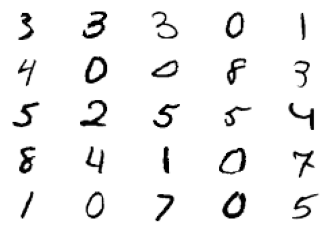

In [46]:
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    ax.axis('off')
    plt.imshow(X_raw[randint(0, X_raw.shape[0])].reshape(28,28), cmap='Greys')

In [47]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

def softmax(a):    
    return (np.exp(a.T)/ sum(np.exp(a.T))).T

In [48]:
t = np.eye(10)[t_raw.astype(int)]
X = np.concatenate([X_raw,np.ones(shape=(X_raw.shape[0],1))],axis=1)

In [49]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(700, 785) (700, 10)
(300, 785) (300, 10)


In [50]:
k=784;m=56;s=10 # 784 features; 56 nodes in the hidden layer; 10 classes

w1=np.random.rand(k+1,m)*0.00001; w2=np.random.rand(m+1,s)
eta=0.01
iter_num=5000

print(w1.shape, w2.shape)
print("The total number of parameters is", w1.shape[0]*w1.shape[1]+w2.shape[0]*w2.shape[1],".")

(785, 56) (57, 10)
The total number of parameters is 44530 .


In [51]:
def black_box(w1,w2,X=X_train):
    h_o=sigmoid(X@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=softmax(h@w2)
    
    return N,h_o, h, y    

In [52]:
def Er(w1,w2):
    N,h_o,h, y=black_box(w1,w2)
    return -np.sum(t_train*np.log(y))/N

In [53]:
def gradE(w1,w2):
    N,h_o,h,y=black_box(w1,w2)
    
    gw1=X_train.T@(h_o*(1-h_o)*((y-t_train)@(w2[:-1]).T))/N
    gw2=h.T@(y-t_train)/N
    
    return gw1, gw2

In [54]:
def accuracy(w1,w2,X=X_train,t=t_train):
    N,h_0,h,y=black_box(w1,w2,X)
    t_pred=np.eye(s)[np.argmax(y,axis=1)]

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [55]:
for i in range(iter_num):
    gw1,gw2=gradE(w1,w2)
    w1-=eta*gw1; w2-=eta*gw2
    if i%500==0:
        print(i, "\t", Er(w1,w2), "\t", accuracy(w1,w2).round(2))

print(Er(w1,w2), accuracy(w1,w2).round(2))

0 	 2.560816262308191 	 10.86
500 	 1.2685457737902532 	 84.86
1000 	 0.8823133991122566 	 86.71
1500 	 0.6912791782780203 	 88.0
2000 	 0.5769865365236071 	 89.43
2500 	 0.49980753011471346 	 90.86
3000 	 0.44334044981862936 	 91.43
3500 	 0.39967268616213353 	 92.71
4000 	 0.36452530921135595 	 93.29
4500 	 0.33537487977136105 	 93.43
0.31067687932585014 94.43


In [56]:
# Test accuracy
accuracy(w1,w2,X_test,t_test)

87.33333333333333

In [57]:
N,h_o,h, y=black_box(w1,w2,X_test)
t_pred=np.eye(s)[np.argmax(y,axis=1)]

Prediction: 0


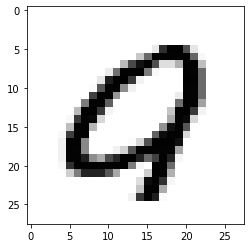

In [66]:
rd=randint(0,N)
plt.imshow(X_test[rd,:-1].reshape(28,28), cmap='Greys')
print('Prediction:', np.argmax(t_pred[rd]))

### Convolutional Neural Networks (CNN)

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

In [25]:
data_raw=np.genfromtxt('mnist.csv',skip_header=1,delimiter=',')

In [26]:
data=data_raw[np.random.choice(data_raw.shape[0], 100, replace=False)]

In [70]:
t_raw = data[:,0]
X_raw = data[:,1:]

In [71]:
X_raw.shape

(100, 784)

In [72]:
def relu(x):
    return np.maximum(x,0)

In [73]:
def heaviside(x):
    y=np.empty(x.shape)
    y[x>=0]=1
    y[x<0]=0
    return y

In [74]:
def softmax(a):    
    return (np.exp(a.T)/ sum(np.exp(a.T))).T

In [75]:
t = np.eye(10)[t_raw.astype(int)]
X = X_raw/255

In [76]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(70, 784) (70, 10)
(30, 784) (30, 10)


### Naive Approach

In [77]:
k=784; ker_size=2; m=81; s=10 # pool_size=3; 28 -> 27 -> 9 

In [78]:
def convolution(w,X=X_train,N=X_train.shape[0]):
    X1=X.reshape((N,28,28))
    C=np.zeros((N,27,27))
    D=np.zeros((N,9,9))
    M=np.zeros((N,9,9))
    for i in range(N):
        for j in range(27):
            for k in range(27):
                C[i,j,k]=np.sum(X1[i,j:j+2,k:k+2]*w)  # convolution
        for j in range(9):
            for k in range(9):
                C_temp=C[i,3*j:3*j+3,3*k:3*k+3]   
                D[i,j,k]=np.max(C_temp)           # pooling
                M[i,j,k]=np.argmax(C_temp)        # recording max positions   
    return D, M
    

In [79]:
def Er(w1,w1_0,w2,N=X_train.shape[0]):
    max_value, max_location =convolution(w1)
    max_value=max_value.reshape(N,m)
    h_o=relu(w1_0+max_value)   # activaiton
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=softmax(h@w2)
    return -np.sum(t_train*np.log(y))/N

In [80]:
def gradE(w1,w1_0,w2,N=X_train.shape[0]):

    max_value, max_location =convolution(w1)
    max_value=max_value.reshape(N,m)
    h_o=relu(w1_0+max_value)   #activation
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=softmax(h@w2)

    delta=heaviside(w1_0+max_value)*((y-t_train)@(w2[:-1]).T) # backpropagation
    
    gw1=np.zeros((2,2))
    for p in range(2):
        for q in range(2):
            x_i=np.zeros((N,m))
            for n in range(N):
                for a in range(9):
                    for b in range(9):
                        mask=max_location[n,a,b]
                        mt=(mask%3).astype(int); ms=((mask-mt)/3).astype(int)
                        x_i[n,9*a+b]=X_train[n,28*(3*a+ms+p)+3*b+mt+q]
            gw1[p,q]=np.sum(delta*x_i)/N
    gw1_0=np.sum(delta)/N 
    
    gw2=h.T@(y-t_train)/N
    return gw1, gw1_0, gw2

In [81]:
def accuracy(w1,w1_0,w2, X=X_train,t=t_train):

    N=X.shape[0]
    max_value, max_location =convolution(w1,X=X,N=N)
    max_value=max_value.reshape(N,m)
    h_o=relu(w1_0+max_value.reshape(N,81))
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=softmax(h@w2)

    t_pred=np.eye(s)[np.argmax(y,axis=1)]

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [82]:
w1=np.random.rand(ker_size,ker_size)*0.1; w1_0=np.random.random()
w2=np.zeros((m+1,s))
eta=0.1
iter_num=100

In [83]:
for i in range(iter_num):
    gw1,gw1_0, gw2=gradE(w1,w1_0,w2)
    w1-=eta*gw1; w1_0-=eta*gw1_0; w2-=eta*gw2
    if i%10==0:
        print(i, "\t", Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))
        

print(Er(w1,w1_0, w2))

0 	 2.2923672408252544 	 21.43
10 	 2.1900060720519896 	 21.43
20 	 2.021837097557046 	 25.71
30 	 1.444673666837299 	 62.86
40 	 0.7566607678680697 	 82.86
50 	 0.42944514319056415 	 97.14
60 	 0.27457718531417297 	 98.57
70 	 0.18727530899952335 	 98.57
80 	 0.1345385872364664 	 100.0
90 	 0.10142055758921491 	 100.0
0.08145618172110713


In [84]:
accuracy(w1,w1_0,w2,X_test,t_test)

70.0

## Vectorization

### Toy Example

In [1]:
input_size=6; ker_size=3; pool_size=2 # 6 -> 4 -> 2

k=int(input_size**2)
c_layer_size=int(input_size-ker_size+1)
p_layer_size=int(c_layer_size/pool_size)
m=int(p_layer_size**2)

k,m,c_layer_size, p_layer_size

(36, 4, 4, 2)

In [3]:
# indexing for convolution

i0=np.repeat(np.arange(ker_size),ker_size)
i1=np.repeat(np.arange(c_layer_size),c_layer_size)
j0=np.tile(np.arange(ker_size),ker_size)
j1=np.tile(np.arange(c_layer_size),c_layer_size)
i_ind=i0.reshape(-1,1)+i1.reshape(1,-1)
j_ind=j0.reshape(-1,1)+j1.reshape(1,-1)

In [4]:
print(i0)
print(i1)
print(j0)
print(j1)
print(i_ind)
print(j_ind)

[0 0 0 1 1 1 2 2 2]
[0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
[0 1 2 0 1 2 0 1 2]
[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3]
[[0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
 [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
 [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
 [1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]
 [1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]
 [1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]
 [2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5]
 [2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5]
 [2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5]]
[[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3]
 [1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
 [2 3 4 5 2 3 4 5 2 3 4 5 2 3 4 5]
 [0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3]
 [1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
 [2 3 4 5 2 3 4 5 2 3 4 5 2 3 4 5]
 [0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3]
 [1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
 [2 3 4 5 2 3 4 5 2 3 4 5 2 3 4 5]]


In [6]:
X=np.arange(k).reshape(input_size, input_size)
print(X)
X1=X[i_ind,j_ind]
print(X1)  
X1.shape

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
[[ 0  1  2  3  6  7  8  9 12 13 14 15 18 19 20 21]
 [ 1  2  3  4  7  8  9 10 13 14 15 16 19 20 21 22]
 [ 2  3  4  5  8  9 10 11 14 15 16 17 20 21 22 23]
 [ 6  7  8  9 12 13 14 15 18 19 20 21 24 25 26 27]
 [ 7  8  9 10 13 14 15 16 19 20 21 22 25 26 27 28]
 [ 8  9 10 11 14 15 16 17 20 21 22 23 26 27 28 29]
 [12 13 14 15 18 19 20 21 24 25 26 27 30 31 32 33]
 [13 14 15 16 19 20 21 22 25 26 27 28 31 32 33 34]
 [14 15 16 17 20 21 22 23 26 27 28 29 32 33 34 35]]


(9, 16)

In [7]:
# indexing for pooling

i0=np.repeat(np.arange(pool_size),pool_size)
i1=np.repeat(np.arange(p_layer_size),p_layer_size)
j0=np.tile(np.arange(pool_size),pool_size)
j1=np.tile(np.arange(p_layer_size),p_layer_size)
ci_ind=i0.reshape(-1,1)+pool_size*i1.reshape(1,-1)
cj_ind=j0.reshape(-1,1)+pool_size*j1.reshape(1,-1)

In [8]:
print(i0)
print(i1)
print(j0)
print(j1)
print(ci_ind)
print(cj_ind)

[0 0 1 1]
[0 0 1 1]
[0 1 0 1]
[0 1 0 1]
[[0 0 2 2]
 [0 0 2 2]
 [1 1 3 3]
 [1 1 3 3]]
[[0 2 0 2]
 [1 3 1 3]
 [0 2 0 2]
 [1 3 1 3]]


In [11]:
C=np.array([2,4,1,0,5,7,9,3,0,1,4,5,6,3,2,1]).reshape(1,c_layer_size, c_layer_size)
print(C)
C1=C[:,ci_ind,cj_ind]
print(C1) 
C1.shape

[[[2 4 1 0]
  [5 7 9 3]
  [0 1 4 5]
  [6 3 2 1]]]
[[[2 1 0 4]
  [4 0 1 5]
  [5 9 6 2]
  [7 3 3 1]]]


(1, 4, 4)

In [13]:
max_value=np.max(C1,axis=1)      # pooling
max_location=np.argmax(C1,axis=1)
print(max_value,max_location)

[[7 9 6 5]] [[3 2 2 1]]


In [14]:
# indexing for conversion of locations of max

i0=np.arange(p_layer_size)
x_ind=i0.reshape(-1,1)*p_layer_size*(pool_size**2)+i0.reshape(1,-1)*pool_size
x_ind=x_ind.reshape(1,-1)

In [15]:
print(i0)
print(x_ind)

[0 1]
[[ 0  2  8 10]]


In [16]:
# indexing for computing z_i^(1) of a sample, i=1,...,m 

N=1
i0=np.repeat(np.arange(N),m)
N_ind=i0.reshape(N,m)

In [17]:
print(N_ind)

[[0 0 0 0]]


In [18]:
delta=np.array([1,2,3,4])
mm=p_layer_size*max_location-(p_layer_size-1)*(max_location%pool_size)+x_ind
X1=X.reshape(N,input_size,input_size)[:,i_ind,j_ind]
X2=X1[N_ind,:,mm]  
gg=(delta*X2.transpose(2,0,1)).transpose(1,0,2)

In [19]:
print(mm)

[[ 5  6 12 11]]


In [20]:
print(X1)

[[[ 0  1  2  3  6  7  8  9 12 13 14 15 18 19 20 21]
  [ 1  2  3  4  7  8  9 10 13 14 15 16 19 20 21 22]
  [ 2  3  4  5  8  9 10 11 14 15 16 17 20 21 22 23]
  [ 6  7  8  9 12 13 14 15 18 19 20 21 24 25 26 27]
  [ 7  8  9 10 13 14 15 16 19 20 21 22 25 26 27 28]
  [ 8  9 10 11 14 15 16 17 20 21 22 23 26 27 28 29]
  [12 13 14 15 18 19 20 21 24 25 26 27 30 31 32 33]
  [13 14 15 16 19 20 21 22 25 26 27 28 31 32 33 34]
  [14 15 16 17 20 21 22 23 26 27 28 29 32 33 34 35]]]


In [21]:
print(X2)

[[[ 7  8  9 13 14 15 19 20 21]
  [ 8  9 10 14 15 16 20 21 22]
  [18 19 20 24 25 26 30 31 32]
  [15 16 17 21 22 23 27 28 29]]]


Recall

$$\frac{\partial E}{\partial w_0^{(1)}} = \sum_{i=1}^m \delta_i^{(1)}$$

$$\frac{\partial E}{\partial w_{p,q}^{(1)}} = \sum_{i=1}^m \delta_i^{(1)} \frac{\partial z_i^{(1)}}{\partial w_{p,q}^{(1)}}$$


In this toy example, we have

$$z_1^{(1)}=7 w_{1,1}^{(1)}+ 8 w_{1,2}^{(1)}+ 9 w_{1,3}^{(1)}+ 13 w_{2,1}^{(1)}+ 14w_{2,2}^{(1)}+ 15 w_{2,3}^{(1)}+ 19 w_{3,1}^{(1)}+ 20 w_{3,2}^{(1)}+ 21 w_{3,3}^{(1)},$$ 

$$\vdots$$

$$z_4^{(1)}=15 w_{1,1}^{(1)}+ 16 w_{1,2}^{(1)}+ 17 w_{1,3}^{(1)}+ 21 w_{2,1}^{(1)}+ 22 w_{2,2}^{(1)}+ 23 w_{2,3}^{(1)}+ 27 w_{3,1}^{(1)}+ 28 w_{3,2}^{(1)}+ 29 w_{3,3}^{(1)}.$$

We have set $\delta=[1,2,3,4]$.



In [22]:
print(gg)

[[[  7  16  54  60]
  [  8  18  57  64]
  [  9  20  60  68]
  [ 13  28  72  84]
  [ 14  30  75  88]
  [ 15  32  78  92]
  [ 19  40  90 108]
  [ 20  42  93 112]
  [ 21  44  96 116]]]


In [23]:
np.sum(np.sum(gg,axis=0),axis=1) # The outer sum is over data points.

array([137, 147, 157, 197, 207, 217, 257, 267, 277])

### MNIST

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
def relu(x):
    return np.maximum(x,0)

In [4]:
def heaviside(x):
    y=np.empty(x.shape)
    y[x>=0]=1
    y[x<0]=0
    return y

In [5]:
def softmax(a):    
    return (np.exp(a.T)/ sum(np.exp(a.T))).T

In [6]:
data_raw=np.genfromtxt('mnist.csv',skip_header=1,delimiter=',')

In [7]:
data=data_raw[np.random.choice(data_raw.shape[0], 1000, replace=False)]

In [8]:
t_raw = data[:,0]
X_raw = data[:,1:]

In [9]:
X_raw.shape

(1000, 784)

In [10]:
t = np.eye(10)[t_raw.astype(int)]
X = X_raw/255

In [11]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(700, 784) (700, 10)
(300, 784) (300, 10)


In [12]:
#input_size=28; ker_size=2; pool_size=3; s=10 # 28 -> 27 -> 9
input_size=28; ker_size=3; pool_size=2; s=10 # 28 -> 26 -> 13

k=int(input_size**2)
c_layer_size=int(input_size-ker_size+1)
p_layer_size=int(c_layer_size/pool_size)
m=int(p_layer_size**2)

k,m,c_layer_size, p_layer_size

(784, 169, 26, 13)

In [13]:
# indexing for convolution

i0=np.repeat(np.arange(ker_size),ker_size)
i1=np.repeat(np.arange(c_layer_size),c_layer_size)
j0=np.tile(np.arange(ker_size),ker_size)
j1=np.tile(np.arange(c_layer_size),c_layer_size)
i_ind=i0.reshape(-1,1)+i1.reshape(1,-1)
j_ind=j0.reshape(-1,1)+j1.reshape(1,-1)

In [14]:
N=X_train.shape[0]
X1=X_train.reshape(N,input_size,input_size)
print(X1.shape)
print(X1[:,i_ind,j_ind].shape)

(700, 28, 28)
(700, 9, 676)


In [15]:
# indexing for pooling

i0=np.repeat(np.arange(pool_size),pool_size)
i1=np.repeat(np.arange(p_layer_size),p_layer_size)
j0=np.tile(np.arange(pool_size),pool_size)
j1=np.tile(np.arange(p_layer_size),p_layer_size)
ci_ind=i0.reshape(-1,1)+pool_size*i1.reshape(1,-1)
cj_ind=j0.reshape(-1,1)+pool_size*j1.reshape(1,-1)

In [16]:
# indexing for conversion of locations of max

i0=np.arange(p_layer_size)
x_ind=i0.reshape(-1,1)*p_layer_size*(pool_size**2)+i0.reshape(1,-1)*pool_size
x_ind=x_ind.reshape(1,-1)

In [17]:
# indexing for computing z_i^(1) of a sample, i=1,...,m 

N=X_train.shape[0]
i0=np.repeat(np.arange(N),m)
N_ind=i0.reshape(N,m)

In [18]:
X_train.shape

(700, 784)

In [19]:
def black_box(w1,w1_0,w2,X=X_train,N=X_train.shape[0]):
    X1=X.reshape(N,28,28)

    C=w1.reshape(1,-1)@X1[:,i_ind,j_ind]   # convolution
    C=C.reshape(N,c_layer_size,c_layer_size)[:,ci_ind,cj_ind]
    max_value=np.max(C,axis=1)      # pooling
    max_location=np.argmax(C,axis=1)   # recording max positions
    h_o=relu(w1_0+max_value)
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=softmax(h@w2)
    
    return y, h, max_value, max_location
    

In [20]:
def Er(w1,w1_0,w2,X=X_train,N=X_train.shape[0]):
    y, h, max_value, max_location = black_box(w1,w1_0,w2)
    return -np.sum(t_train*np.log(y))/N

In [21]:
def gradE(w1,w1_0,w2,X=X_train,N=X_train.shape[0]):
    
    y, h, max_value, max_location = black_box(w1,w1_0,w2)
    delta=heaviside(max_value+w1_0)*((y-t_train)@(w2[:-1]).T)
    
    mm=p_layer_size*max_location-(p_layer_size-1)*(max_location%pool_size)+x_ind
    X1=X.reshape(N,28,28)[:,i_ind,j_ind]
    X2=X1[N_ind,:,mm]  
    gg=(delta*X2.transpose(2,0,1)).transpose(1,0,2)

    gw1=np.sum(np.sum(gg,axis=0),axis=1)/N  # The outer sum is over data points.
    gw1=gw1.reshape(ker_size,ker_size)
    gw1_0=np.sum(delta)/N 
    
    gw2=h.T@(y-t_train)/N
    return gw1, gw1_0, gw2

In [22]:
def accuracy(w1,w1_0,w2,X=X_train,t=t_train):

    N=X.shape[0]
    y, h, max_value, max_location = black_box(w1,w1_0,w2,X,N)

    t_pred=np.eye(s)[np.argmax(y,axis=1)]

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [23]:
w1=np.random.rand(ker_size,ker_size)*0.1; w1_0=np.random.random()
w2=np.zeros((m+1,s))
eta=0.02
iter_num=2000

In [24]:
for i in range(iter_num):
    gw1,gw1_0, gw2=gradE(w1,w1_0,w2)
    w1-=eta*gw1; w1_0-=eta*gw1_0; w2-=eta*gw2
    if i%200==0:
        print(i, "\t", Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))
        

print(i, "\t", Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))

0 	 2.298921291880855 	 12.43
200 	 0.3670605492624606 	 91.86
400 	 0.20326210533549216 	 95.29
600 	 0.14050975051098583 	 97.0
800 	 0.1027867771503581 	 98.14
1000 	 0.07809402526133309 	 99.0
1200 	 0.061312279755162576 	 99.43
1400 	 0.04945838421421409 	 100.0
1600 	 0.04080692644704383 	 100.0
1800 	 0.034316604672687705 	 100.0
1999 	 0.02935228999498761 	 100.0


In [25]:
accuracy(w1,w1_0,w2,X_test,t_test)

91.33333333333333

### Stochstic Gradient Descent, Batch and Epoch

In [26]:
data=data_raw[np.random.choice(data_raw.shape[0], 10000, replace=False, )]

In [27]:
t_raw = data[:,0]
X_raw = data[:,1:]

In [28]:
t = np.eye(10)[t_raw.astype(int)]
X = X_raw/255

In [29]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(7000, 784) (7000, 10)
(3000, 784) (3000, 10)


In [30]:
#input_size=28; ker_size=2; pool_size=3; s=10
input_size=28; ker_size=3; pool_size=2; s=10
#input_size=28; ker_size=5; pool_size=2; s=10

k=int(input_size**2)
c_layer_size=int(input_size-ker_size+1)
p_layer_size=int(c_layer_size/pool_size)
m=int(p_layer_size**2)

k,m,c_layer_size, p_layer_size

(784, 169, 26, 13)

In [31]:
# indexing for convolution

i0=np.repeat(np.arange(ker_size),ker_size)
i1=np.repeat(np.arange(c_layer_size),c_layer_size)
j0=np.tile(np.arange(ker_size),ker_size)
j1=np.tile(np.arange(c_layer_size),c_layer_size)
i_ind=i0.reshape(-1,1)+i1.reshape(1,-1)
j_ind=j0.reshape(-1,1)+j1.reshape(1,-1)

In [32]:
# indexing for pooling

i0=np.repeat(np.arange(pool_size),pool_size)
i1=np.repeat(np.arange(p_layer_size),p_layer_size)
j0=np.tile(np.arange(pool_size),pool_size)
j1=np.tile(np.arange(p_layer_size),p_layer_size)
ci_ind=i0.reshape(-1,1)+pool_size*i1.reshape(1,-1)
cj_ind=j0.reshape(-1,1)+pool_size*j1.reshape(1,-1)

In [33]:
# indexing for conversion of locations of max

i0=np.arange(p_layer_size)
x_ind=i0.reshape(-1,1)*p_layer_size*(pool_size**2)+i0.reshape(1,-1)*pool_size
x_ind=x_ind.reshape(1,-1)

In [34]:
def black_box(w1,w1_0,w2,X=X_train,N=X_train.shape[0]):
    X1=X.reshape(N,28,28)

    C=w1.reshape(1,-1)@X1[:,i_ind,j_ind]   # convolution
    C=C.reshape(N,c_layer_size,c_layer_size)[:,ci_ind,cj_ind]
    max_value=np.max(C,axis=1)      # pooling
    max_location=np.argmax(C,axis=1)   # recording max positions
    h_o=relu(w1_0+max_value)
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=softmax(h@w2)
    
    return y, h, max_value, max_location
    

In [35]:
def Er(w1,w1_0,w2,X=X_train,N=X_train.shape[0]):
    y, h, max_value, max_location = black_box(w1,w1_0,w2)
    return -np.sum(t_train*np.log(y))/N

In [36]:
def gradE(w1,w1_0,w2,X=X_train,t=t_train,N=X_train.shape[0],iter_order=0):
    
#    r_ind=np.random.choice(N,batch_size)    # random choice of samples
#    X=X[r_ind]; t=t[r_ind]; N=batch_size   

    N_t=int(N/batch_size)
    i_t=iter_order%N_t  
    r_ind=np.arange(i_t*batch_size, (i_t+1)*batch_size)
    X=X[r_ind]; t=t[r_ind]; N=batch_size
    
    y, h, max_value, max_location = black_box(w1,w1_0,w2,X,N)
    delta=heaviside(max_value+w1_0)*((y-t)@(w2[:-1]).T)
    
    i0=np.repeat(np.arange(N),m)
    N_ind=i0.reshape(N,m)

    mm=p_layer_size*max_location-(p_layer_size-1)*(max_location%pool_size)+x_ind
    X1=X.reshape(N,28,28)[:,i_ind,j_ind]
    X2=X1[N_ind,:,mm]
    gg=(delta*X2.transpose(2,0,1)).transpose(1,0,2)

    gw1=np.sum(np.sum(gg,axis=0),axis=1)/N
    gw1=gw1.reshape(ker_size,ker_size)
    gw1_0=np.sum(delta)/N 
    
    gw2=h.T@(y-t)/N
    return gw1, gw1_0, gw2

In [37]:
def accuracy(w1,w1_0,w2,X=X_train,t=t_train):

    N=X.shape[0]
    y, h, max_value, max_location = black_box(w1,w1_0,w2,X,N)

    t_pred=np.eye(s)[np.argmax(y,axis=1)]

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [38]:
w1=np.random.rand(ker_size,ker_size)*0.1; w1_0=np.random.random()
w2=np.zeros((m+1,s))
eta=0.01
#iter_num=100

In [39]:
batch_size=100

for i in range(5000):
    gw1,gw1_0, gw2=gradE(w1,w1_0,w2,iter_order=i)
    w1-=eta*gw1; w1_0-=eta*gw1_0; w2-=eta*gw2
    if i%500==0:
        print(i, "\t", Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))
        

print(Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))

0 	 2.3011201787188185 	 10.27
500 	 0.4130542432703644 	 88.7
1000 	 0.3165366327965091 	 90.67
1500 	 0.2850369902602024 	 91.6
2000 	 0.2772319601091898 	 91.74
2500 	 0.2613335574263097 	 92.11
3000 	 0.255059678147887 	 92.5
3500 	 0.2455773568166824 	 92.63
4000 	 0.23903338967949914 	 93.07
4500 	 0.23298516530196828 	 93.3
0.22951141023652924 	 93.29


In [40]:
accuracy(w1,w1_0,w2,X_test,t_test)

92.46666666666667

### TensorFlow and Keras

In [ ]:
# !conda install -c conda-forge keras --yes

In [ ]:
# !conda install -c conda-forge tensorflow --yes

### Neural Network with One hidden layer using Keras

In [2]:
import numpy as np

import tensorflow as tf
##### 
# suppress error messages; not needed unless you use M1 processor
tf.get_logger().setLevel('INFO')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#######

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, t_train), (x_test, t_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
t_train = keras.utils.to_categorical(t_train, num_classes)
t_test = keras.utils.to_categorical(t_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(56, activation='sigmoid'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 56)                43960     
                                                                 
 dense_1 (Dense)             (None, 10)                570       
                                                                 
Total params: 44,530
Trainable params: 44,530
Non-trainable params: 0
_________________________________________________________________


In [4]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, t_train, batch_size=batch_size, epochs=epochs)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.7466 - accuracy: 0.8416
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3230 - accuracy: 0.9139
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2556 - accuracy: 0.9291
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2180 - accuracy: 0.9396
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1916 - accuracy: 0.9468


In [5]:
score = model.evaluate(x_test, t_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1857723444700241
Test accuracy: 0.9470000267028809


### CNN using Keras

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # 32 filters
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(2, 2), activation="relu"), # 64 filters
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [7]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, t_train, batch_size=batch_size, epochs=epochs)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3177 - accuracy: 0.9093
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0784 - accuracy: 0.9765
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0590 - accuracy: 0.9823
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0496 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0415 - accuracy: 0.9872


In [8]:
score = model.evaluate(x_test, t_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.040244605392217636
Test accuracy: 0.9866000413894653


### Fashion MNIST

In [10]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, t_train), (x_test, t_test) = keras.datasets.fashion_mnist.load_data()

### Can you design a neural network for this dataset with acccuray > 94%?



In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train[6,10,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
         0,   0,  90, 138, 223, 214, 209, 167,   0,   0,   0,   6, 124,
         0,   0], dtype=uint8)